# Title: Rate of speech adaptation to gradually increasing delayed auditory feedback

## by Monique C. Tardif

# 2. Background

When we speak, we can typically hear what we say; this is called auditory feedback. We use this feedback by comparing it to what we intended to say, to determine whether or not we produced an error in our speech. Models of speech motor control typically include the predictive models that serve to anticipate the auditory consequences of planned speech, which is then compared to auditory feedback. Auditory-motor adaptation experiments are used to investigate the short-term plasticity of spectral (the what. i.e formants and pitch) predictions from the forward model by gradually altering the feedback signals heard by participants over many trials. However, these studies have not established the extent of plasticity of temporal (the when) forward model predictions. Delayed auditory feedback (DAF) is commonly used to modify when feedback arrives and causes noticeable rate reductions during speech (Yates, 1961). Karlin, Naber, and Parrell (2021), showed that individuals are sensitive to focal changes in feedback timing during vowel productions. The goal of this study is to quantify adaptation to gradual changes in latency of delayed auditory feedback (DAF). We did so by applying paradigms previously used for measuring adaptation to gradual spectral changes. Katz and Lackner (1977) showed that participants adapted to a DAF task similar to the one used presently, but to our knowledge that study has not been replicated. 

Figure 1. (Malloy et al., (2022))

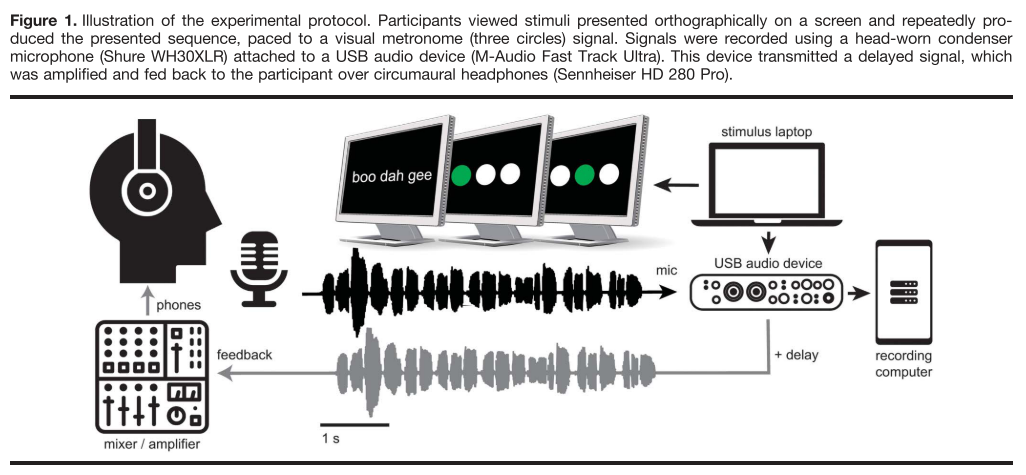

In this study, participants repeated 3-syllable nonword sequences into a microphone and heard themselves back over headphones (See Figure 1). The timing between when they produced the word was altere: this is was I will call delayed auditory feedback (DAF). DAF was presented in three experimental conditions (200 trials each), with order counterbalanced across participants. The outcome variable was speech rate, which is typically reduced under DAF. Speech rate was estimated for each trial using the VocalToolkit plugin for Praat. Each condition was divided into phases (see figure 2 below): baseline (25 trials), ramp (100 trials), hold (50 trials), and after-effect (25 trials). In the GRADUAL condition, delay was linearly increased from 25 to 100 ms during the ramp and held at 100 ms throughout the hold. In the SUDDEN condition, delay was set to 100 ms throughout the ramp and hold. In the RANDOM condition, the same delays experienced throughout the GRADUAL condition were presented in random order.  We hypothesized that participants would partially adapt to delays in the GRADUAL condition, leading to reduced changes in speech rate compared to the SUDDEN and RANDOM conditions. 

Warning message:
"Removed 6 row(s) containing missing values (geom_path)."


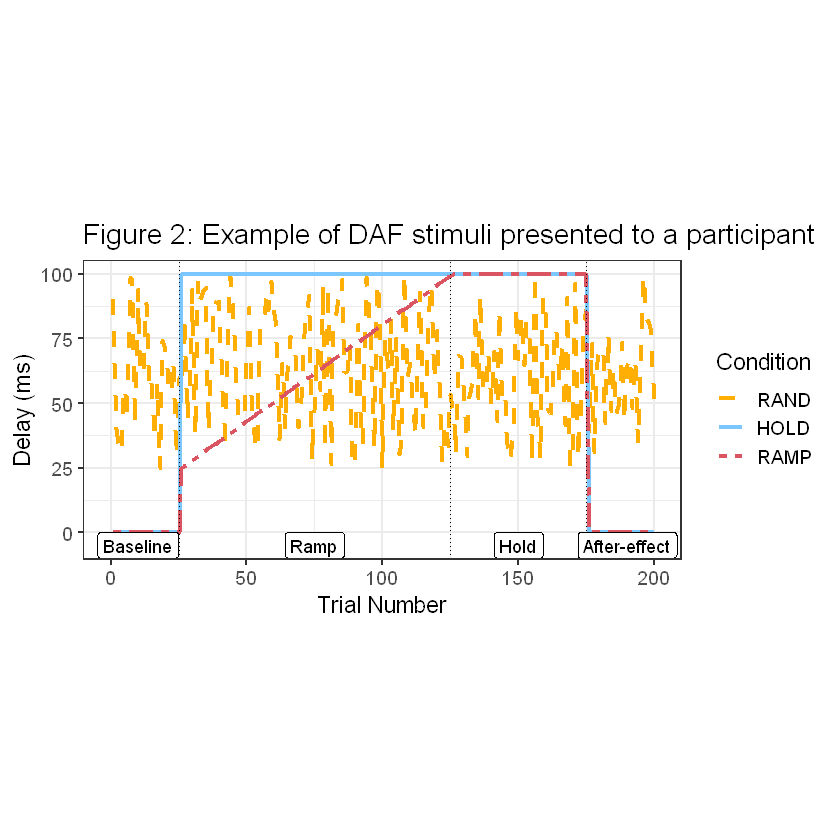

In [68]:
# stim <- read_csv('C:/Users/MCT40/University of Pittsburgh/Speech Neural Systems Lab - NSFDAF (1)/NSFDAF_CODE/DAFADAPT/DAFADAPT_Ranalysis/STIM_DAFADAPT007.csv')
# stim$variable <- factor(stim$variable, levels=c("RAND", "HOLD", "RAMP"))

# Plot stimulus 
ggplot(data = stim, aes(x=Trial_num, y=value, colour=variable, linetype=variable)) + 
      geom_line(size=1.3) +
      theme_bw(14) +
      labs(title = "Figure 2: Example of DAF stimuli presented to a participant", x = "Trial Number", 
          y = "Delay (ms)") +
      ylim(-5, 100) +
      xlim(0,200)+
      geom_vline(xintercept= 25, linetype="dotted") +
      geom_vline(xintercept= 125, linetype="dotted") +
      geom_vline(xintercept= 175, linetype="dotted")  +
      geom_label(aes(x= 10, y=-4.75), label = paste("Baseline"), colour="black", fill="white") +
      geom_label(aes(x= 75, y=-4.75), label = paste("Ramp"), colour="black", fill="white") +
      geom_label(aes(x= 150, y=-4.75), label = paste("Hold"), colour="black", fill="white") +
      geom_label(aes(x= 190, y=-4.75), label = paste("After-effect"), colour="black", fill="white") +
      scale_colour_manual(name = "Condition", values=c("#FFAE03", "#7CC6FE", "#DB5461" )) +
      scale_linetype_manual(name = "Condition", values = c(2, 1, 6)) +
      theme(aspect.ratio = 0.5)

# 3. Variables
### Outcome variables
#### Rate of speech: 
Rate of speech is the outcome measure; a continuous numerical variable that quantifies the number of syllables a participant produced in a second. We obtained these values by parsing each utterance produce on a given trial and using praat’s Vocal toolkit plugin extracted the rate of speech measures using a semi-automatic algorithm that counts acoustic spectral peaks over the duration of phonation. Our lab completed some testing to optimize the settings of the algorithm as well as some manual reliability testing, I will not get into the details here for the sake of brevity. We have one measure of rate of speech per trial per participant, which is ideally 600 trials per experiment x 29 participants = 17 400 observations of rate of speech. The final number is different due to cleaning and participant exclusion discussed below. 

#### Baseline corrected rate of speech (BSC_SR): 
This variable is the same as above, however it has been normalized to the baseline section of the experiment. This means, that the mean rate of speech for the GRADUAL and SUDDEN conditions were calculated for each individual condition. For those same conditions, the participant’s baseline mean rate of speech was subtracted from the rate of per individual trial. This provides us with a measure quantifying how much the rate of speech has changed given the presentation of delay (either gradually or suddenly). For the RAND condition, the participant mean for GRADUAL and SUDDEN pooled was used as a baseline. This was done to ensure that we could compare the rate of speech under delay, to one under no delay (there were no 0delay trials in the RAND condition). 

### Predictor variables (random and fixed)
#### Delay: 
This continuous numerical variable quantifies the amount of time between the production of a word and the playback over headphones. That is to say, the difference between when a participant said a word, and when they heard it; the amount of delayed auditory feedback (DAF) received by a participant on any given trial. It ranges from 0 (or a very minimal subthreshold 6 ms) to 100ms. This is the key independent variables that was manipulated in three different ways across the 3 conditions of the experiments (explained below).

#### Participant ID: 
This is an arbitrary categorical variable applied to organize participants by the order they participated in the experiment. No significance should be placed on the numerical values attributed to each participants. In the end there are 23 participants included in the final analysis. 

#### Condition: 
The condition is a categorical variable that distinguishes between three orders of DAF presentation. See figure ZXC for a diagram of these conditions. SUDDEN is a condition in which following a baseline 25 trials with 0 delay, the delay is increased to 100ms during the hold phase for 150 trials, followed by an after-effect phase where the delay returns to 0 for 25 trials. The GRADUAL condition is the one in which following a similar baseline portion to the SUDDEN condition, the RAND is the presentation of random delays distributed between 15-100ms to mirror the delays presented in the GRADUAL condition across all phases of the experiment. Each participant received all three conditions. 

#### Trial Number: 
A discrete series of numbers from 1-200 per condition, totaling 600 trials per participant. The trial number is related to the amount of delay provided to participants (as described for the condition variable). 

#### Section of experiment: 
This categorical variable serves as a way to bin trials in order to best represent the changes occurring in the condition at that portion of the experiment. The first 25 trials are labelled as “baseline” since in the GRADUAL and SUDDEN conditions these trials contain no delayed auditory feedback (DAF). From trials 26-125, this is the ramp section: in the GRADUAL condition this means that there is a 0.75ms increase of delay per trial, in the SUDDEN condition the delay is held constant at 100ms. Next is the hold section, during both the GRADUAL and SUDDEN conditions the delays are held at 100ms. Finally, the GRADUAL and SUDDEN conditions contain a final 25 trials with 0 ms DAF. The sections of the experiment are less applicable or important when applying it to the RAND condition since, for this condition, the delays have been randomly assigned to any given trial. 

#### Order: 
The order of presentation of conditions was pseudorandomized for each participant to make sure they were controlled across all participants. 6 presentations were rotated between—e.g., GRADUAL presented first, followed by SUDDEN, then RAND, or RAND, GRADUAL, SUDDEN. This is a categorical variable that will be controlled for as a random factor. 


# 4. Hypotheses

#### Purpose and Hypotheses
The purpose of this study was to examine the degree of plasticity present in the temporal predictions of forward models of speech. Specifically, we aimed to establish to what extent individuals can learn to compensate to (be less affected by) gradually increasing magnitudes of delayed auditory feedback (DAF). 

#### Hypothesis 1
Prior work establishes that participants reduce their rate of speech in response to DAF (Shiller et al., 2020; Yates, 1963). We predict that the incremental increase of DAF will lead to compensation—smaller reduction—in rate of speech. This comparison will be quantified across all sections, but with particular attention to the hold section in the GRADUAL vs. SUDDEN conditions, where we will see more slowing of rate of speech (a slower rate of speech: i.e a large negative Estimate coefficient) in the SUDDEN condition when compared to the GRADUAL condition. Since we anticipate that different delay presentations will have different effects on rate of speech, we anticipate seeing an interaction between condition and section of the experiment. This will be mostly driven by the ramp and hold sections. 

We will address this hypothesis using 3 different analysis techniques: 
1.	Mixed-effect model
2.	t-tests
3.	Bayes factors

#### Ignore hypothesis 2
I wanted to acknowledge the conversation and meeting we had a couple weeks ago. However, with catching COVID I have had a lot less energy than I expected and was not able to complete the work needed for this second hypothesis. Instead I extended hypothesis 1 to included all 3 methods. This way I can eventually apply them to hypothesis 2. 

##### Hypothesis 2 (ignore). 
Prior studies establish that delays larger than 50ms DAF seems to have a noticeable impact on speech (Stuart et al., 2002). Here, we wish to explore the threshold which delay along the ramp from 25-100ms begin to affect rate of speech compared to the previous delay. This will be quantified across the ramp portion of the experiment for the GRADUAL condition, and along a corresponding section of the SUDDEN condition. Repeated t-test analysis & Bayesian analyses will reveal at every trial bin whether there is a difference between the GRADUAL and SUDDEN condition. 


# 5. Data Organization

#### Data Architecture
##### Hypothesis 1 focused on setting up the data for Mixed-effect model
The data is in a tidy data table with one observation per row per relevant variable (condition, experiment section, participant, order, trial number). This will allow me to run a linear mixed effects model. The model will need to collapse across the experiment section variable (since all trial are included). I haven't removed this level of detail to allow for the measure of variability, and ease of plotting/visualizing the results. 

#### Data cleansing & Tidying
During data collection 4 participants were excluded due to failing the hearing screening. Leaving a total of 24 viable participants. 1 participant was excluded from the current analysis due to technical difficulties during the praat vocal toolkit analysis (DAFADAPT019) leaving a total of 23 participants. We also performed a participant level outlier analysis removing any data lying outside of the interquartile range 0.025 – 0.0975, which is outside of 99.95% of the data. This removal resulted in a final grand total of 13 083 individual utterances across 23 participants. The final dataset contains 7 columns: participant, order, condition, trialnum, speechrate, BSC_SR, exp_section. 

This data is tidy since there is only one observation per variable of interest, per row. In this long (very long) format each individual row represents an individual utterance a given participant produced and the information attached to that trial. 
The following is a description of the R code below, once the data is loaded into R: 
1.	Rename the columns of the original dataset I loaded. Since the data were collected, and analyzed in matlab and praat the naming schemes were not always held constant.  
2.	I dropped columns with data I will not be analyzing for this analysis
3.	I format the data columns to facilitate later data manipulation
4.	I rename the conditions to match how I have described them in this document with their “SUDDEN”, “GRADUAL”, and “RAND”. 
5.	I remove outliers at the participant level. And remove participant DAFADAPT019 due to technical errors in praat.  
6.	I normalize to baseline using a loop through individual participants, then through each condition (since the normalization process occurs at the condition level for each participant)
7.	In this step I add individual coding for the different sections of the experiment to facilitate analysis in future steps. 
8.	I order the factors so that R processes then in the same order I think of them (this step goes away when I save, but I like doing it anyways)
9.	I summarize and look at my final dataset



In [3]:
# Load tidyverse
# library(tidyverse)

# Organizing the DAFADAPT data

##### Load #####
DAFADAPTFeb22 <- read.csv("C:/Users/MCT40/University of Pittsburgh/Speech Neural Systems Lab - NSFDAF_DATA/VT_DAFADAPT_Feb2022/CONCATENATED_DATA_Feb2022/combData_2022-02-13.csv")

# 1
# FORMATTING ####
 ## rename type column to condition
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'subject'] <- "NSFDAF_participant"
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'session'] <- "participant"
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'type'] <- "order"
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'block'] <- "condition"
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'Syl'] <- "syl"
  names(DAFADAPTFeb22)[names(DAFADAPTFeb22) == 'trial'] <- "trialnum"

# 2
#Drop uneeded columns 
DAFADAPTFEB22_2 <- subset(DAFADAPTFeb22, select =c("participant", "order", "condition", "trialnum", "speechrate"))

#preview dataset 
head(DAFADAPTFEB22_2) 

# 3 
## Change format of the data #factors, numeric etc
DAFADAPT_VT <- DAFADAPTFEB22_2
DAFADAPT_VT$participant <- as.factor(DAFADAPT_VT$participant)
DAFADAPT_VT$condition <- as.factor(DAFADAPT_VT$condition)
DAFADAPT_VT$order <- as.factor(DAFADAPT_VT$order)

# 4
#rename the conditions so that they're more intuitively named (according to the report I'Ve written)
DAFADAPT_VT$condition <- as.character(DAFADAPT_VT$condition)
DAFADAPT_VT['condition'][DAFADAPT_VT['condition'] == "HOLD"] <- "SUDDEN"
DAFADAPT_VT['condition'][DAFADAPT_VT['condition'] == "RAMP"] <- "GRADUAL"
DAFADAPT_VT$condition <- as.factor(DAFADAPT_VT$condition)

#summary(DAFADAPT_VT) ##DAFADAPT019 is an outlier and will need to be dropped due to the number of trials, there was an issue with the VTK sampling (double sampling)
rm(DAFADAPTFeb22, DAFADAPTFEB22_2) #clear previous datasets to remove clutter in the workspace

# 5
##Remove outliers
##### Participant level outlier removal #####
DAFADAPT_ALL <- DAFADAPT_VT
DAFADAPT_nooutliers <- DAFADAPT_ALL[0,]

#Loop to remove outliers [0.025 < X < 0.975] per participant
for (i in 1:length(unique(DAFADAPT_ALL$participant))){
  tempdata <-  DAFADAPT_ALL[DAFADAPT_ALL$participant == unique(DAFADAPT_ALL$participant)[i],]
  iqr <- quantile(tempdata$speechrate, probs=c(.025, .975), na.rm = FALSE) 
  tempdata_cl <- subset(tempdata, tempdata$speechrate > (iqr[1]) & tempdata$speechrate < (iqr[2]))
  DAFADAPT_nooutliers <- rbind(DAFADAPT_nooutliers, tempdata_cl)
} 
rm(i, tempdata_cl, tempdata)
#head(DAFADAPT_nooutliers)

##### Drop DAFADAPT019 #####
DAFADAPT_nooutliers2 <- DAFADAPT_nooutliers #just in case
DAFADAPT_nooutliers <- subset(DAFADAPT_nooutliers, participant != "DAFADAPT019")
rm(DAFADAPT_nooutliers2, DAFADAPT_ALL, DAFADAPT_VT)

#6
# baseline correct speech rate per participant
DAFADAPT_BSC2 = data.frame(matrix(ncol = 6, nrow = 0))
colnames(DAFADAPT_BSC2) <- c('participant', 'order', 'condition', 'trialnum', 'speechrate', 'BSC_SR')

for (j in 1:length(unique(DAFADAPT_nooutliers$participant))) {
  
    unique_PID <- unique(DAFADAPT_nooutliers$participant)
    DF_short <- subset(DAFADAPT_nooutliers, DAFADAPT_nooutliers$participant==unique_PID[j])
    
  for (i in 1:length(unique(DAFADAPT_nooutliers$condition))){
    
    #Sudden
      BS_mean_SUD <- subset(DF_short, condition == "SUDDEN" & trialnum <= 25)
      BS_mean_S <- mean(BS_mean_SUD$speechrate[BS_mean_SUD$trialnum <= 25 & BS_mean_SUD$condition == "SUDDEN"])
      DF_short$BSC_mean[DF_short$condition == "SUDDEN"] <- BS_mean_S
      DF_short$BSC_SR[DF_short$condition == "SUDDEN"] <- DF_short$speechrate[DF_short$condition == "SUDDEN"] - BS_mean_S
    #Gradual  
      BS_mean_GRAD <- subset(DF_short, condition == "GRADUAL" & trialnum <= 25)
      BS_mean_G <- mean(BS_mean_GRAD$speechrate[BS_mean_GRAD$trialnum <= 25 & BS_mean_GRAD$condition == "GRADUAL"])
      DF_short$BSC_mean[DF_short$condition == "GRADUAL"] <- BS_mean_G
      DF_short$BSC_SR[DF_short$condition == "GRADUAL"] <- DF_short$speechrate[DF_short$condition == "GRADUAL"] - BS_mean_G
    #Rand  
      BS_mean_RAND <- subset(DAFADAPT_nooutliers, condition != "RAND" & trialnum <= 25)
      BS_mean_R <- mean(BS_mean_RAND$speechrate[BS_mean_RAND$trialnum <= 25 & BS_mean_RAND$condition != "RAND"])
      DF_short$BSC_mean[DF_short$condition == "RAND"] <- BS_mean_R
      DF_short$BSC_SR[DF_short$condition == "RAND"] <- DF_short$speechrate[DF_short$condition == "RAND"] - BS_mean_R
      
    rm(BS_mean_SUD, BS_mean_GRAD, BS_mean_RAND)
    DAFADAPT_BSC2 <- rbind(DF_short, DAFADAPT_BSC2)
  }
    DAFADAPT_BSC3 <- distinct(DAFADAPT_BSC2, across(c("participant", "order", "condition", "trialnum", "speechrate", "BSC_SR", "BSC_mean")), .keep_all = TRUE) #delete repetitions because of janky code 
}
  
# 7
##### add exp section columns #####
    #Add a column that determines the section of the experiment (e.g. baseline)
DAFADAPT_VT_normed <- DAFADAPT_BSC3
DAFADAPT_VT_normed %>%
  mutate(is_baseline = trialnum <= 25) %>%
  mutate(is_ramp  = trialnum >=25 & trialnum <=125) %>%
  mutate(is_hold = trialnum >=125 & trialnum <=175) %>%
  mutate(is_after = trialnum >=175 & trialnum <=200) -> DAFADAPT_normed2

#Add a column that defines it's section of the experiment (baseline, ramp, hold, after-effect)
DAFADAPT_baseline <- DAFADAPT_normed2[DAFADAPT_normed2$trialnum <= 25,]
length <- length(DAFADAPT_baseline$trialnum)
DAFADAPT_baseline$exp_section <- rep("baseline", length)

DAFADAPT_ramp <- DAFADAPT_normed2[DAFADAPT_normed2$trialnum > 25 & DAFADAPT_normed2$trialnum <= 125,]
length <- length(DAFADAPT_ramp$trialnum)
DAFADAPT_ramp$exp_section <- rep("ramp", length)

DAFADAPT_hold <- DAFADAPT_normed2[DAFADAPT_normed2$trialnum > 125 & DAFADAPT_normed2$trialnum <= 175,]
length <- length(DAFADAPT_hold$trialnum)
DAFADAPT_hold$exp_section <- rep("hold", length)

DAFADAPT_after <- DAFADAPT_normed2[DAFADAPT_normed2$trialnum > 175 & DAFADAPT_normed2$trialnum <= 200,]
length <- length(DAFADAPT_after$trialnum)
DAFADAPT_after$exp_section <- rep("after-effect", length)

DAFADAPT_TC <- rbind(DAFADAPT_baseline, DAFADAPT_ramp, DAFADAPT_hold, DAFADAPT_after)
rm(DAFADAPT_baseline, DAFADAPT_ramp, DAFADAPT_hold, DAFADAPT_after)

DAFADAPT_TC <- subset(DAFADAPT_TC, select=c("participant", "order", "condition", "trialnum", "speechrate", "BSC_SR", "exp_section"))
DAFADAPT_TC <- droplevels(DAFADAPT_TC)

# 8
#order the factors temporally in the experiment in both datasets
DAFADAPT_final <- DAFADAPT_TC
DAFADAPT_final$exp_section <- factor(DAFADAPT_final$exp_section, levels=c("baseline", "ramp", "hold", "after-effect"))
DAFADAPT_final$condition <- factor(DAFADAPT_final$condition, levels=c("RAND", "GRADUAL", "SUDDEN"))

print("Summary and preview of final dataset")
summary(DAFADAPT_final)
head(DAFADAPT_final)

#### save dataset ####
#write.csv(DAFADAPT_final, 'NSFDAF_final_MAY2022.csv')

,participant,order,condition,trialnum,speechrate
,<chr>,<chr>,<chr>,<int>,<dbl>
1,DAFADAPT010,order1,HOLD,1,5.07
2,DAFADAPT010,order1,HOLD,2,4.51
3,DAFADAPT010,order1,HOLD,3,5.01
4,DAFADAPT010,order1,HOLD,4,4.88
5,DAFADAPT010,order1,HOLD,5,5.25
6,DAFADAPT010,order1,HOLD,6,5.35


[1] "Summary and preview of final dataset"


      participant      order        condition       trialnum    
 DAFADAPT004: 570   order1:1706   RAND   :4395   Min.   :  1.0  
 DAFADAPT006: 570   order2:1707   GRADUAL:4369   1st Qu.: 51.0  
 DAFADAPT013: 570   order3:3415   SUDDEN :4319   Median :100.0  
 DAFADAPT020: 570   order4:1706                  Mean   :100.6  
 DAFADAPT021: 570   order5:2277                  3rd Qu.:151.0  
 DAFADAPT024: 570   order6:2272                  Max.   :200.0  
 (Other)    :9663                                               
   speechrate        BSC_SR               exp_section  
 Min.   :2.410   Min.   :-2.12308   baseline    :1628  
 1st Qu.:3.890   1st Qu.:-0.60417   ramp        :6545  
 Median :4.250   Median :-0.26440   hold        :3262  
 Mean   :4.288   Mean   :-0.24215   after-effect:1648  
 3rd Qu.:4.670   3rd Qu.: 0.09553                      
 Max.   :6.550   Max.   : 1.94692                      
                                                       

,participant,order,condition,trialnum,speechrate,BSC_SR,exp_section
,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
14000,DAFADAPT026,order1,SUDDEN,1,4.40,0.50086957,baseline
14001,DAFADAPT026,order1,SUDDEN,2,3.41,-0.48913043,baseline
14002,DAFADAPT026,order1,SUDDEN,3,4.47,0.57086957,baseline
14004,DAFADAPT026,order1,SUDDEN,5,4.13,0.23086957,baseline
14006,DAFADAPT026,order1,SUDDEN,7,3.83,-0.06913043,baseline
14007,DAFADAPT026,order1,SUDDEN,8,4.30,0.40086957,baseline


#### 2 & 3. t-tests & Bayes factors

For the t-tests we needed to simplify the dataframes and change them to wide format as outlined below
Furthermore we separated them into individual sections of the experiment to simplify the process of running a t-test on each section. 
In a future version with hypothesis 2, I would like to run this through a loop so that it can be done per trial. 

In [32]:
#for the t-tests

  #### Applied to DAFADAPT 
  DAFADAPT$condition <- as.factor(DAFADAPT$condition)
  DAFADAPT <- droplevels(DAFADAPT)
  DAFADAPT2 <- subset(DAFADAPT, select = c("participant", "condition", "trialnum", "BSC_SR", "exp_section"))
  
  DAFADAPT_baseline     <- DAFADAPT2[DAFADAPT2$exp_section == "baseline",]
  DAFADAPT_ramp         <- DAFADAPT2[DAFADAPT2$exp_section == "ramp",]
  DAFADAPT_hold         <- DAFADAPT2[DAFADAPT2$exp_section == "hold",]
  DAFADAPT_after.effect <- DAFADAPT2[DAFADAPT2$exp_section == "after-effect",]
  
  DAFADAPT_bs.w <- DAFADAPT_baseline %>%
    spread(key=condition,value=BSC_SR)  %>%
    drop_na() %>% #wide format - all measurements for one participant are in same row
    mutate(diffScores= GRADUAL - SUDDEN) # in case you want to look at the differences. 
  
  DAFADAPT_r.w <- DAFADAPT_ramp %>%
    spread(key=condition,value=BSC_SR)  %>%
    drop_na() %>% #wide format - all measurements for one participant are in same row
    mutate(diffScores= GRADUAL - SUDDEN)
  
  DAFADAPT_h.w <- DAFADAPT_hold %>%
    spread(key=condition,value=BSC_SR)  %>%
    drop_na() %>% #wide format - all measurements for one participant are in same row
    mutate(diffScores= GRADUAL - SUDDEN)
  
  DAFADAPT_ae.w <- DAFADAPT_after.effect %>%
    spread(key=condition,value=BSC_SR)  %>%
    drop_na() %>% #wide format - all measurements for one participant are in same row
    mutate(diffScores= GRADUAL - SUDDEN)
  head(DAFADAPT_ae.w)

participant,trialnum,exp_section,GRADUAL,SUDDEN,RAND,diffScores
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
DAFADAPT001,176,after-effect,-0.7472,-0.7566667,0.4569217,0.009466667
DAFADAPT001,177,after-effect,-0.3072,-0.4866667,-0.1030783,0.179466667
DAFADAPT001,178,after-effect,0.0128,-0.7566667,0.2669217,0.769466667
DAFADAPT001,179,after-effect,-0.1272,-0.4166667,0.4869217,0.289466667
DAFADAPT001,181,after-effect,0.3228,0.2733333,0.2369217,0.049466667
DAFADAPT001,182,after-effect,-0.9772,-0.3466667,0.1369217,-0.630533333


# 6. Analysis

#### 1. Mixed-effects model
To test the hypothesis that rate of speech was differentially affected by section of the experiment across different conditions I ran a mixed effects model. The outcome measure was baseline corrected rate of speech. The fixed effects were condition, and experimental section. These were coded so that the contrasts were relative to the baseline section, and the GRADUAL condition.

In [57]:
# Load packages
    #install.packages("lmerTest")
    #install.packages("lme4")
#library(lme4)
#library(lmerTest)

#load dataset again
#DAFADAPT <- read_csv("C:/Users/MCT40/University of Pittsburgh/Speech Neural Systems Lab - NSFDAF (1)/NSFDAF_CODE/DAFADAPT/DAFADAPT_Ranalysis/NSFDAF_final_MAY2022.csv")

#### Final columns included #### 
DAFADAPT <- subset(DAFADAPT, select=c("participant", "order", "condition", "trialnum", "BSC_SR", "exp_section"))

# Set factors
DAFADAPT <- as.data.frame(DAFADAPT)
DAFADAPT$order <- as.factor(DAFADAPT$order)
DAFADAPT$participant <- as.factor(DAFADAPT$participant)
DAFADAPT$condition <- as.factor(DAFADAPT$condition)
DAFADAPT$exp_section <- as.factor(DAFADAPT$exp_section)

##Organize the factors
DAFADAPT$exp_section <- factor(DAFADAPT$exp_section, levels=c("baseline", "ramp", "hold", "after-effect"))
DAFADAPT$condition <- factor(DAFADAPT$condition, levels=c("GRADUAL", "SUDDEN", "RAND"))
DAFADAPT <- droplevels(DAFADAPT)
#### MEM ####
# Set the contrasts
contrasts(DAFADAPT$exp_section) <- contr.treatment(n=levels(DAFADAPT$exp_section), base=1) # This makes baseline the contrast section
contrasts(DAFADAPT$condition) <- contr.treatment(n=levels(DAFADAPT$condition), base=1) #set the gradual condition as the contrast condition. I think this makes sense because I want to compare 
#make sure they were set properly
contrasts(DAFADAPT$exp_section)
contrasts(DAFADAPT$condition)

#run model
DAFADAPT_LME <- lmer(BSC_SR ~ exp_section*condition + (1|participant) + (1|order), data=DAFADAPT) #relative to baseline portion of the experiment and random condition
summary(DAFADAPT_LME)


,ramp,hold,after-effect
baseline,0,0,0
ramp,1,0,0
hold,0,1,0
after-effect,0,0,1


,SUDDEN,RAND
GRADUAL,0,0
SUDDEN,1,0
RAND,0,1


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: BSC_SR ~ exp_section * condition + (1 | participant) + (1 | order)
   Data: DAFADAPT

REML criterion at convergence: 18702.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3727 -0.6763 -0.0882  0.6384  4.1091 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.01647  0.1283  
 order       (Intercept) 0.02148  0.1466  
 Residual                0.24168  0.4916  
Number of obs: 13083, groups:  participant, 23; order, 6

Fixed effects:
                                          Estimate Std. Error         df
(Intercept)                             -1.158e-02  6.907e-02  5.640e+00
exp_sectionramp                         -1.769e-01  2.333e-02  1.305e+04
exp_sectionhold                         -2.812e-01  2.569e-02  1.305e+04
exp_sectionafter-effect                 -2.893e-02  2.951e-02  1.305e+04
conditionSUDDEN                         -3.957e-03 

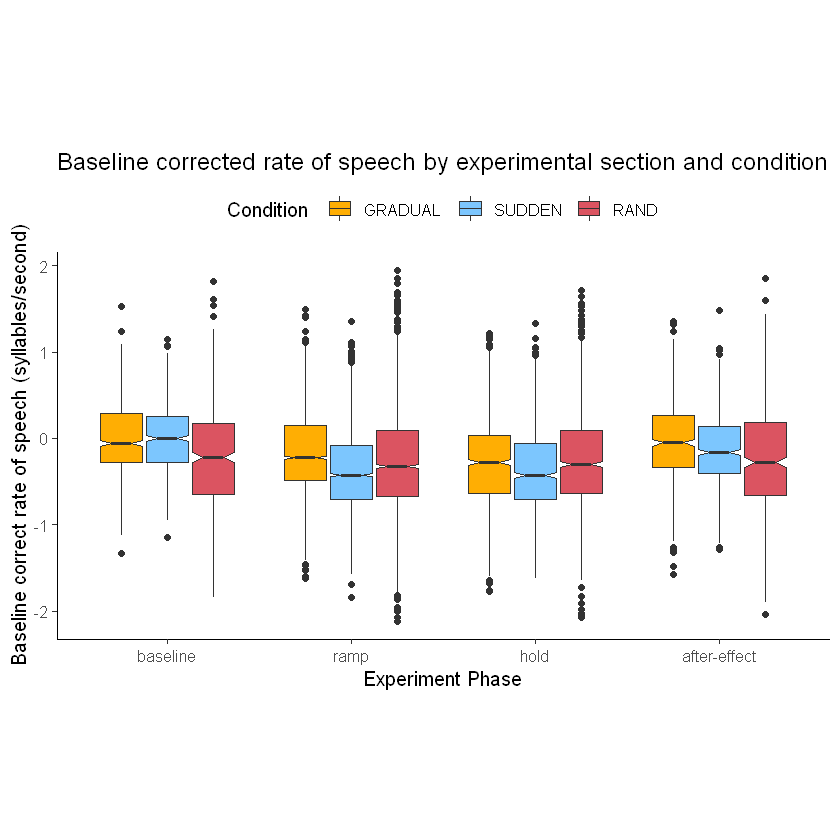

In [59]:
#visualization

### plot this
  ggplot(data= DAFADAPT, aes(x=exp_section, y=BSC_SR, fill=condition)) + 
  geom_boxplot(notch = TRUE) +
  theme_classic(12) +
  labs(fill="Condition", y= "Baseline correct rate of speech (syllables/second)", 
       x= "Experiment Phase", title = "Baseline corrected rate of speech by experimental section and condition") +
  scale_fill_manual(values=c("#FFAE03","#7CC6FE", "#DB5461")) +
  theme(legend.position="top", aspect.ratio = 0.5) 


##### Results & interpretation
We ran a linear mixed-effects model to estimate the fixed effects of condition (SUDDEN, GRADUAL, RANDOM) and section (baseline, ramp, hold, after-effect) and random effects of participant and order of condition presentation on baseline-corrected speech rate. We found a main effects (relative to baseline) of ramp (β =-.18, SE = .02, *p* < .001), and hold (β =-.28, SE = .02, *p* < .001), but not after-effect (β =-.03, SE = .02, *p* = .33). These results, during the ramp section support the idea that different delays differential affect rate of speech; during the hold section this main effect allows us to reject null that there is no difference between the baseline and the hold section--these results indicate that delay does impact rate of speech and the coefficient estimates indicate that the conditions with delay slowed down rate of speech by approximately 0.28 syllables/second in the hold section comapred to the baseline section across all conditions. 

We also found main effect of condition relative to the GRADUAL condition for the RAND (β =-.19, SE = .03, *p* < .001), but not for the SUDDEN (β =-.004, SE = .03, *p* = 0.33) condition. These results indicate that overall the RAND condition slowed down rate of speech more than GRADUAL by 0.19 syllables/second, but that the SUDDEN condition did not have this same effect. This is an outcome since the GRADUAL and SUDDEN condition are meant to be designed in a similar way, and on average (while washing out the effects of the different sections) may not have a different impact on rate of speech. 

Importantly, we found significant interactions between conditions and sections of the experiment. We found a significant interaction relative to the GRADUAL condition and baseline section for the SUDDEN condition of ramp (β =-.20, SE = .03, *p* < .001), hold (β =-.09, SE = .04, *p* = .02), and after-effect (β =-.09, SE = .04, *p* < .02) sections. Indicating that for the SUDDEN condition the ramp portion (trials 26-100) was rate of speech was slower for the SUDDEN condition by 0.20 syllables/sec, this is probably due to the large difference in delays between the two conditions during this section. 

Similarly, we found interactions for the RAND condition for the ramp (β =.10, SE = .03, *p* < .005), and hold (β = .22, SE = .04, *p* < .001) sections, but not for the after-effect (β = .008, SE = .04, *p* = .84) section. These results are less easily interpretable, but overall provide evidence that gradually increasing the delay in the pattern we chose lead to a different pattern of rate of speech than when the delays were randomly altered. 


#### 2. t-tests

Due to multiple comparisons with a bonferroni adjusted alpha, significance is set at 0.05/4 = 0.0125. 

In [37]:
## Traditional paired t-test  
  t.test(DAFADAPT_bs.w$GRADUAL,DAFADAPT_bs.w$SUDDEN,paired=TRUE) #N.S (t (481) = -0.37, p = .71)
  t.test(DAFADAPT_r.w$GRADUAL,DAFADAPT_r.w$SUDDEN,paired=TRUE)   #*** (t (1963)= 13.44, p < .001)
  t.test(DAFADAPT_h.w$GRADUAL,DAFADAPT_h.w$SUDDEN,paired=TRUE)   #*** (t (971) = 4.54 , p < .001)
  t.test(DAFADAPT_ae.w$GRADUAL,DAFADAPT_ae.w$SUDDEN,paired=TRUE) #*** (t (499) = 3.73 , p < .001)


	Paired t-test

data:  DAFADAPT_bs.w$GRADUAL and DAFADAPT_bs.w$SUDDEN
t = -0.36566, df = 481, p-value = 0.7148
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06345792  0.04354514
sample estimates:
mean of the differences 
           -0.009956392 



	Paired t-test

data:  DAFADAPT_r.w$GRADUAL and DAFADAPT_r.w$SUDDEN
t = 13.44, df = 1963, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1695609 0.2275013
sample estimates:
mean of the differences 
              0.1985311 



	Paired t-test

data:  DAFADAPT_h.w$GRADUAL and DAFADAPT_h.w$SUDDEN
t = 4.5429, df = 971, p-value = 6.245e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05579542 0.14065647
sample estimates:
mean of the differences 
             0.09822595 



	Paired t-test

data:  DAFADAPT_ae.w$GRADUAL and DAFADAPT_ae.w$SUDDEN
t = 3.7275, df = 499, p-value = 0.0002155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04750471 0.15340028
sample estimates:
mean of the differences 
              0.1004525 


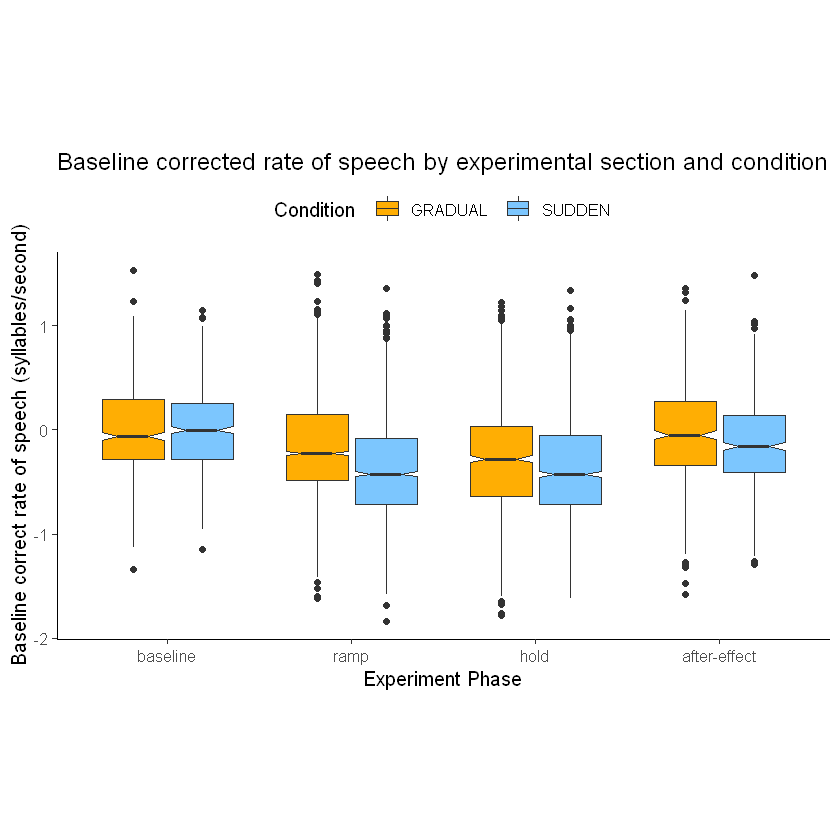

In [60]:
#Visualization

  ### plot this
  ggplot(data= DAFADAPT[DAFADAPT$condition != "RAND",], aes(x=exp_section, y=BSC_SR, fill=condition)) + 
    geom_boxplot(notch = TRUE) +
    theme_classic(12) +
    labs(fill="Condition", y= "Baseline correct rate of speech (syllables/second)", 
         x= "Experiment Phase", title = "Baseline corrected rate of speech by experimental section and condition") +
    scale_fill_manual(values=c("#FFAE03","#7CC6FE", "#DB5461")) +
    theme(legend.position="top", aspect.ratio = 0.5) 

# In another life I would love to add asterixes to this plot to indicate significance

##### Results & Interpretation

We calculated a paired t-test for each of the experimental sections to compare across the SUDDEN and GRADUAL conditions. 
there was no difference between the two baseline sections (t (481) = -0.37, p = .71). There was a difference between the two ramp sections (probably due to the drastic difference in delays) t (1963)= 13.44, p < .001). Most importantly there was a difference between the hold section between the two conditions (t (971) = 4.54 , p < .001). Finally, we observed a difference between after-effect section between the two conditions t (499) = 3.73 , p < .001). 

These results provide sufficient evidence to reject the null hypothesis the ramp phase in the GRADUAL condition did not lead to adaptation (no changes in rate of speech) to the DAF. Providing some evidence towards the hypothesis that gradually presenting delayed auditory feedback allows the forward models to update their temporal predictions and reducing the impact of DAF on rate of speech. We learn to adapt to gradually increasing DAF. 

#### 3. Bayes Factors comparing to a t-test
Below is my bayes factor analysis to compare to the above t-test. 

In my drafts of this project I also completed the Bayes factor analysis comparison to MEM, but I was not able to complete it in time to submit it here for final judgement. I think it would have been helpful to form a full picture of the data for this project. 

In [50]:
#install.packages("BayesFactor") 
#library(BayesFactor)

# ttestBF
  bf.bs = ttestBF(x = DAFADAPT_bs.w$GRADUAL, y = DAFADAPT_bs.w$SUDDEN, paired=TRUE) # this is the BF object
  bf.bs # the relative evidence for the alternative hypothesis (nonzero difference between conditions)
  1/bf.bs #the relative evidence for the null hypothesis (no difference between conditions)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.05470183 ±0.4%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


Bayes factor analysis
--------------
[1] Null, mu=0 : 18.28092 ±0.4%

Against denominator:
  Alternative, r = 0.707106781186548, mu =/= 0 
---
Bayes factor type: BFoneSample, JZS


  BASELINE: the evidence for the alternative (0.05) is much lower than for the null (18.28).

In [43]:
# ttestBF
  bf.r = ttestBF(x = DAFADAPT_r.w$GRADUAL, y = DAFADAPT_r.w$SUDDEN, paired=TRUE) # this is the BF object
  bf.r # the relative evidence for the alternative hypothesis (nonzero difference between conditions)
  1/bf.r #the relative evidence for the null hypothesis (no difference between conditions)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 7.473942e+35 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


Bayes factor analysis
--------------
[1] Null, mu=0 : 1.337982e-36 ±0%

Against denominator:
  Alternative, r = 0.707106781186548, mu =/= 0 
---
Bayes factor type: BFoneSample, JZS


RAMP: the evidence for the alternative (7.47) is higher than for the null (1.34).
  


In [44]:
  bf.h = ttestBF(x = DAFADAPT_h.w$GRADUAL, y = DAFADAPT_h.w$SUDDEN, paired=TRUE) # this is the BF object
  bf.h # the relative evidence for the alternative hypothesis (nonzero difference between conditions)
  1/bf.h #the relative evidence for the null hypothesis (no difference between conditions)
  


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 952.7854 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


Bayes factor analysis
--------------
[1] Null, mu=0 : 0.001049554 ±0%

Against denominator:
  Alternative, r = 0.707106781186548, mu =/= 0 
---
Bayes factor type: BFoneSample, JZS


HOLD: the evidence for the alternative (952.79) is much higher than for the null (0.001).
  


In [45]:
  bf.ae = ttestBF(x = DAFADAPT_ae.w$GRADUAL, y = DAFADAPT_ae.w$SUDDEN, paired=TRUE) # this is the BF object
  bf.ae # the relative evidence for the alternative hypothesis (nonzero difference between conditions)
  1/bf.ae #the relative evidence for the null hypothesis (no difference between conditions)
  

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 45.70279 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


Bayes factor analysis
--------------
[1] Null, mu=0 : 0.0218805 ±0%

Against denominator:
  Alternative, r = 0.707106781186548, mu =/= 0 
---
Bayes factor type: BFoneSample, JZS


AFTER-EFFECT: the evidence for the alternative (45.70) is higher than for the null (0.71).


In [46]:
##Let's look at direction: was SUDDEN more likely to produce slower (lower) Rate of speech scores than the GRADUAL condition
  bfInterval.bs = ttestBF(x = DAFADAPT_bs.w$diffScores, nullInterval=c(-Inf,0))
  bfInterval.bs

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.07025848 ±0%
[2] Alt., r=0.707 !(-Inf<d<0) : 0.03914518 ±0.02%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


BASELINE: The evidence is not more strongly in favor of a negative difference (0.07) or a positive difference (0.039).



In [47]:
  bfInterval.r = ttestBF(x = DAFADAPT_r.w$diffScores, nullInterval=c(-Inf,0)) 
  bfInterval.r

t is large; approximation invoked.

t is large; approximation invoked.



Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.001385926  ±NA%
[2] Alt., r=0.707 !(-Inf<d<0) : 1.494788e+36 ±NA%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


RAMP: The evidence is less strongly in favor of a negative difference (0.001) than a positive difference (1.49).
  


In [48]:
  bfInterval.h = ttestBF(x = DAFADAPT_h.w$diffScores, nullInterval=c(-Inf,0))  
  bfInterval.h

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.006144656 ±0%
[2] Alt., r=0.707 !(-Inf<d<0) : 1905.565    ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


HOLD: The evidence is much less strongly in favor of a negative difference (0.006) than a positive difference (1905.57).
  
 

In [49]:
 bfInterval.ae = ttestBF(x = DAFADAPT_ae.w$diffScores, nullInterval=c(-Inf,0)) 
 bfInterval.ae

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.01027422 ±0.01%
[2] Alt., r=0.707 !(-Inf<d<0) : 91.39531   ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS


  AFTER-EFFECT: The evidence is less strongly in favor of a negative difference (0.01) than a positive difference (91.40).

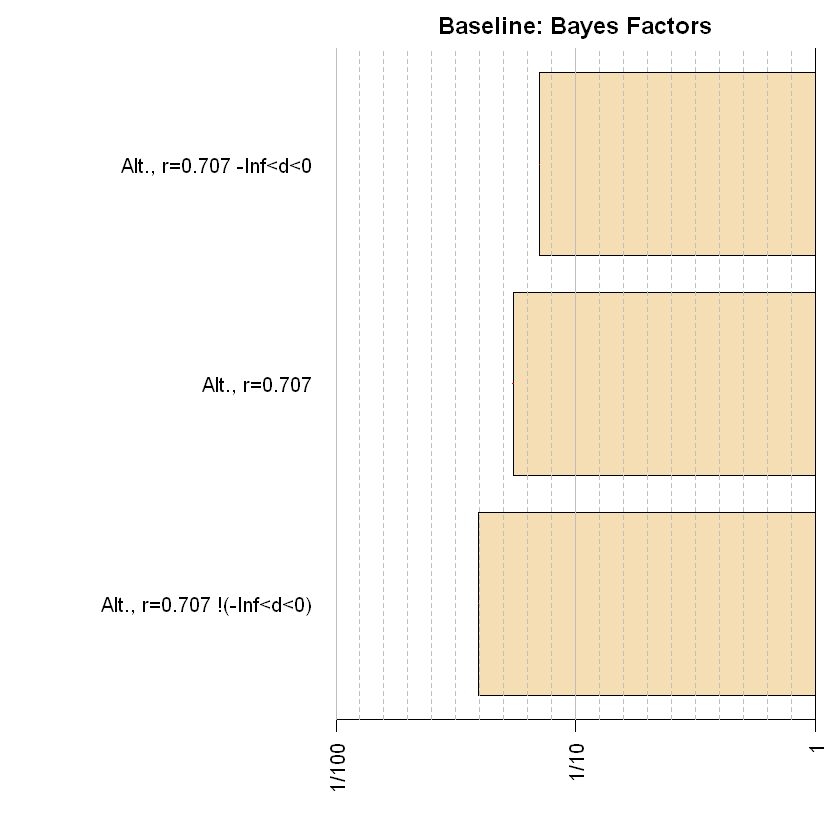

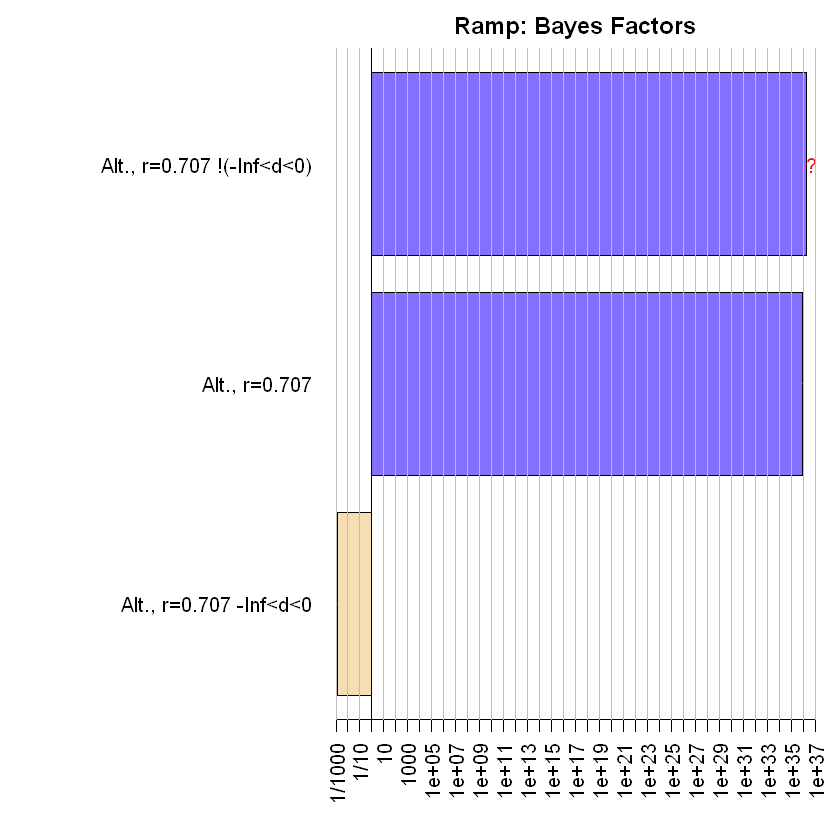

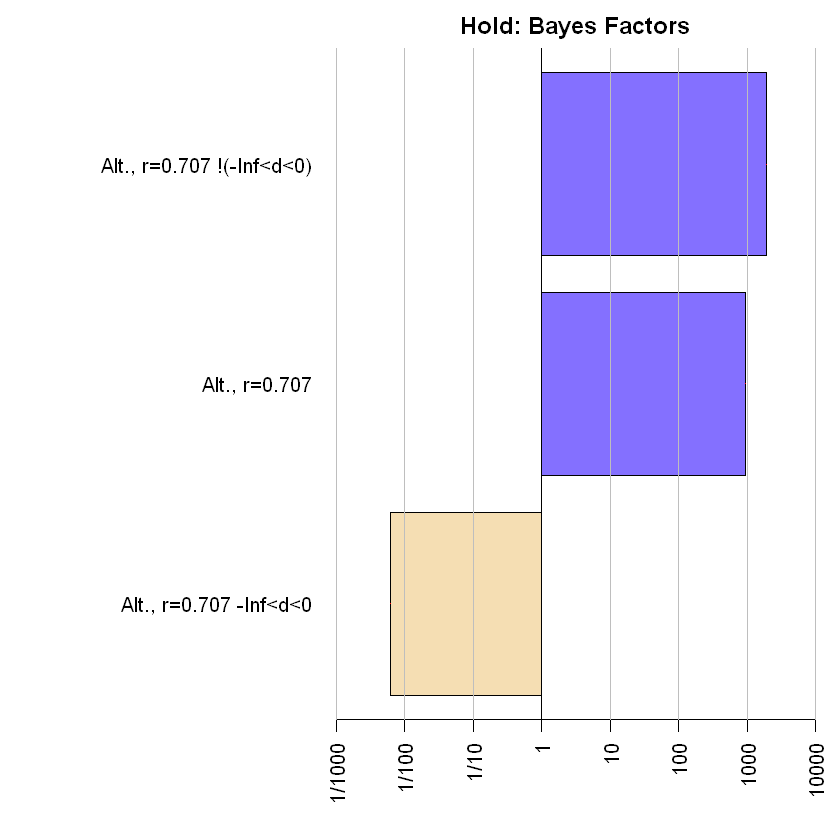

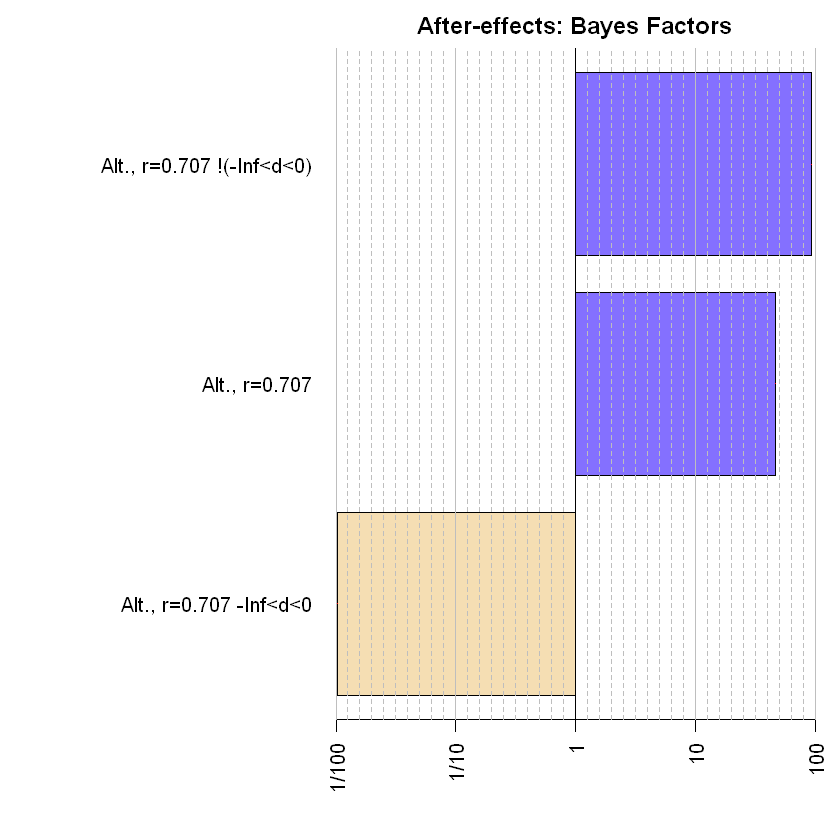

In [71]:
# Visualizations
#baseline
  allbf.bs = c(bf.bs, bfInterval.bs)
  #allbf.bs
  plot(allbf.bs, main = "Baseline: Bayes Factors")

#ramp
  allbf.r = c(bf.r, bfInterval.r)
  #allbf.r
  plot(allbf.r, main = "Ramp: Bayes Factors")

#hold
  allbf.h = c(bf.h, bfInterval.h)
  #allbf.h
  plot(allbf.h, main = "Hold: Bayes Factors")
 
#after-effect
  allbf.ae = c(bf.ae, bfInterval.ae)
  #allbf.ae
  plot(allbf.ae, main = "After-effects: Bayes Factors")

##### Results & Interpretation

**Non-directional analysis**

* BASELINE: the evidence for the alternative (0.05) is much lower than for the null (18.28).
* RAMP: the evidence for the alternative (7.47) is higher than for the null (1.34).
* HOLD: the evidence for the alternative (952.79) is much higher than for the null (0.001).
* AFTER-EFFECT: the evidence for the alternative (45.70) is higher than for the null (0.71).

**Looking to see if GRADUAL was slower than SUDDEN --directional analysis**

* BASELINE: The evidence is not more strongly in favor of a negative difference (0.07) or a positive difference (0.039).
* RAMP: The evidence is less strongly in favor of a negative difference (0.001) than a positive difference (1.49).
* HOLD: The evidence is much less strongly in favor of a negative difference (0.006) than a positive difference (1905.57).
* AFTER-EFFECT: The evidence is less strongly in favor of a negative difference (0.01) than a positive difference (91.40).

These results can be interpreted, specially while focusing on the results of the HOLD section, that there is very strong evidence to support the alternative hypothesis that the SUDDEN condition will have a stronger effect of slowing down rate of speech compared to GRADUAL, rather than the null that there will be no difference between conditions. 

# 7.Conclusion

Overall, these results demonstrate that speakers were able to maintain a faster speaking rate when delays were introduced gradually over time in the GRADUAL condition rather than suddenly in the SUDDEN condition. In other words participants were less impacted by the DAF (their rate of speech was less reduced) when presented with small gradual increases in the delay. The evidence to reject the null hypothesis that the GRADUAL and SUDDEN condition were equivalent was present in all three ways of modelling the data from the mixed-effect model, to t-tests, to Bayes factors. The evidence detailed above supports the hypothesized theory that forward temporal predictions are adaptable during speech.

## 8. Acknowledgements

I would like to thank and acknowledge my advisor Dr. Jason W. Bohland for his help and input during the development of the design, implementation, and analysis of this project. Next, I would like to thank Dr. Matthias Heyne for his help with Matlab and praat’s Vocal Toolkit, as well as for his companionship in the lab along the way. I would like to thank Ashley PetitJean, Caroline Fox, and Megan Liu, and Emily Hacker for their support in recruitment and in the lab during the process. Finally, thank you to my moral support all-star Emily Goldberg for her unrelenting belief in me and my ability to get through this PhD.  

I would also like to thank both of you, Tim and Amy, for your enthusiasm alongside your help and support throughout this semester. I learned a lot, so thank you. 